# Exploring Minority-related data in the AP and Carnegie Datasets

Sections load AP data and combine years then report some correlations of the AP outcomes on the national level ['msi','hbcu','hsi','tribal','womens','control','rooms']. Scatterplots and correlations of mean are included. Pacific Islander, 2+ Races, and No Response were excluded

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import data_loaders
sns.set_theme(context='paper',style='white', font='sans-serif', font_scale=3, color_codes=True)#, rc={'figure.figsize':(10.0,10.0)})

In [2]:
# Loading Data

carnegie=data_loaders.gimmeCarnegieLimted()
outcomes_2022=data_loaders.gimmeOutcomes(2022)
outcomes_2021=data_loaders.gimmeOutcomes(2021)
outcomes_2017=data_loaders.gimmeOutcomes(2017)
outcomes_2012=data_loaders.gimmeOutcomes(2012)
states_abbrv=pd.read_csv('data/State Abbreviation.csv')


In [3]:
# Aggregating Years

outcomes_2012['Year']=2012
outcomes_2017['Year']=2017
outcomes_2021['Year']=2021
outcomes_2022['Year']=2022
outcomes=pd.concat([outcomes_2012,outcomes_2017,outcomes_2021,outcomes_2022])
minorities_ap=['Overall', 'Asian', 'Hispanic/Latino', 'White',
       'Black or African American', 'Native American or Alaska Native',
       'Native Hawaiian or other Pacific Islander', 'Two or More Races',
       'No Response']

In [4]:
carnegie.keys()

Index(['name', 'city', 'stabbr', 'basic2021', 'enrprofile2021', 'sector',
       'control', 'hbcu', 'hsi', 'msi', 'womens', 'selindex', 'rooms',
       'ugtenr20', 'tribal'],
      dtype='object')

In [5]:
# Prepare Categorical Summation
carnegie_states_summed=[]
for state in states_abbrv['stabbr']:
    carnegie_states_summed.append([state,
    carnegie['msi'].loc[carnegie['stabbr']==state].sum(),
    carnegie['hbcu'].loc[carnegie['stabbr']==state].sum(),
    carnegie['hsi'].loc[carnegie['stabbr']==state].sum(),
    carnegie['tribal'].loc[carnegie['stabbr']==state].sum(),
    carnegie['womens'].loc[carnegie['stabbr']==state].sum(),
    carnegie['control'].loc[carnegie['stabbr']==state].loc[carnegie['control']==1].sum(),
    carnegie['rooms'].loc[carnegie['stabbr']==state].mean()])
carnegie_states_summed=pd.DataFrame(carnegie_states_summed,columns=['stabbr','msi','hbcu','hsi','tribal','womens','control','rooms'])


In [6]:
outcomes_ap_carnegie=pd.merge(outcomes,carnegie_states_summed,on='stabbr')
outcomes_ap_carnegie=outcomes_ap_carnegie.replace('**',np.nan)
outcomes_ap_carnegie=outcomes_ap_carnegie.dropna()
outcomes_ap_carnegie=outcomes_ap_carnegie.loc[outcomes_ap_carnegie['Race']!='Two or More Races']
outcomes_ap_carnegie=outcomes_ap_carnegie.loc[outcomes_ap_carnegie['Race']!= 'Native Hawaiian or other Pacific Islander']


C:\Users\shann\AppData\Local\Temp\ipykernel_20080\1043966200.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  outcomes_ap_carnegie=outcomes_ap_carnegie.replace('**',np.nan)


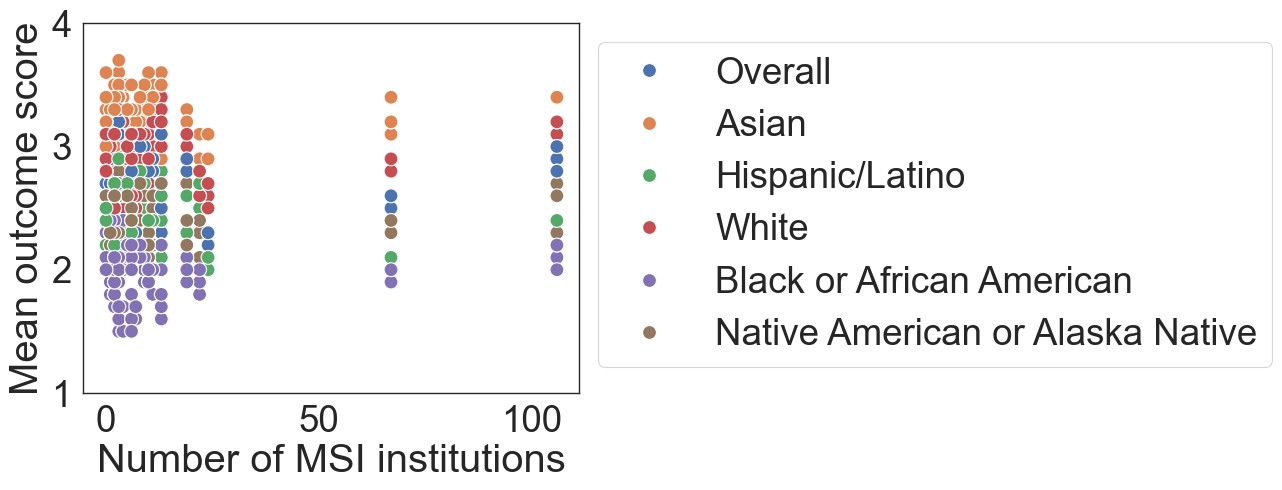

In [7]:
sns.scatterplot(data=outcomes_ap_carnegie.loc[outcomes_ap_carnegie['State']!='National'],x='msi',y='Mean',hue='Race',s=100)
plt.ylim(int(outcomes_ap_carnegie['Mean'].min()),round(outcomes_ap_carnegie['Mean'].max()))
plt.legend(bbox_to_anchor=(1,1))
plt.xlabel('Number of MSI institutions')
plt.ylabel('Mean outcome score')
plt.show()

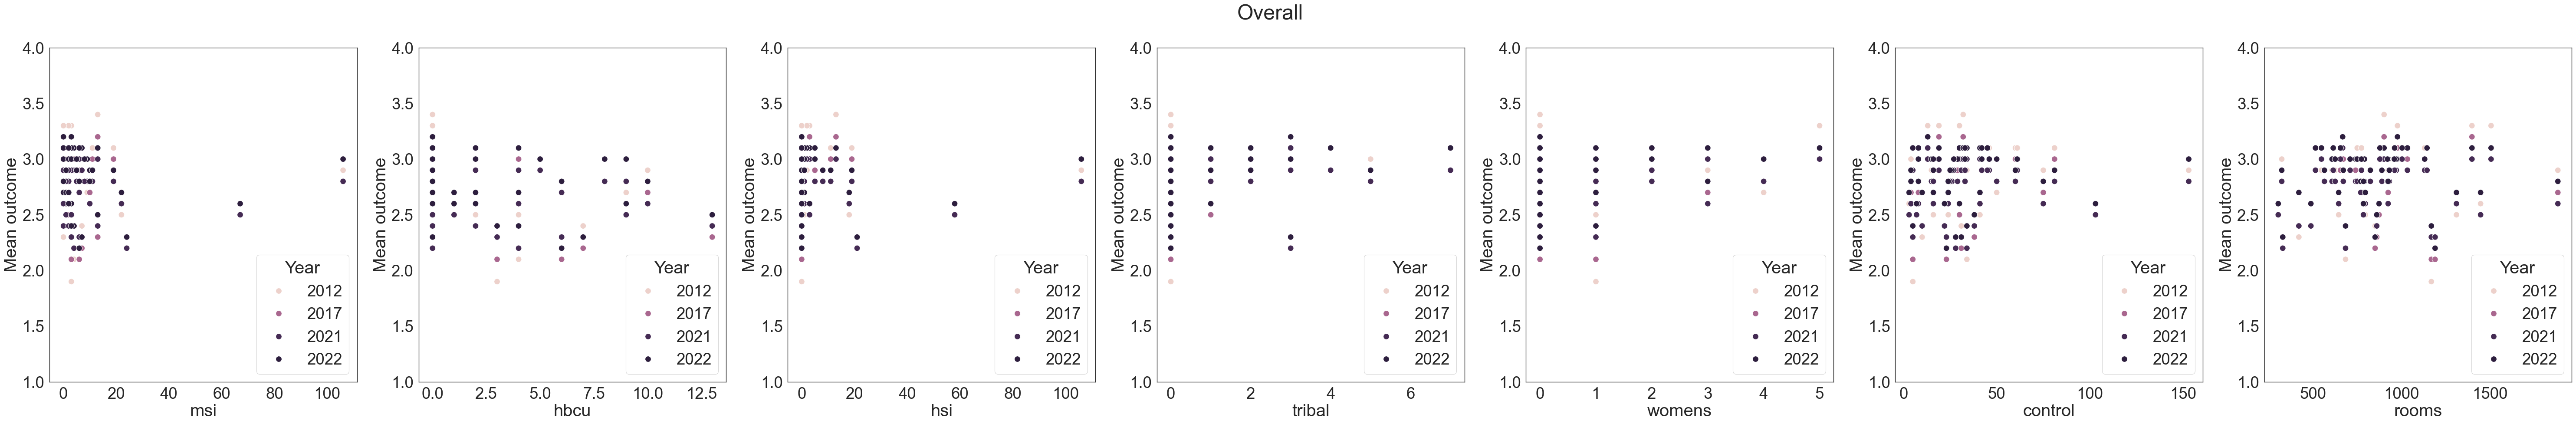

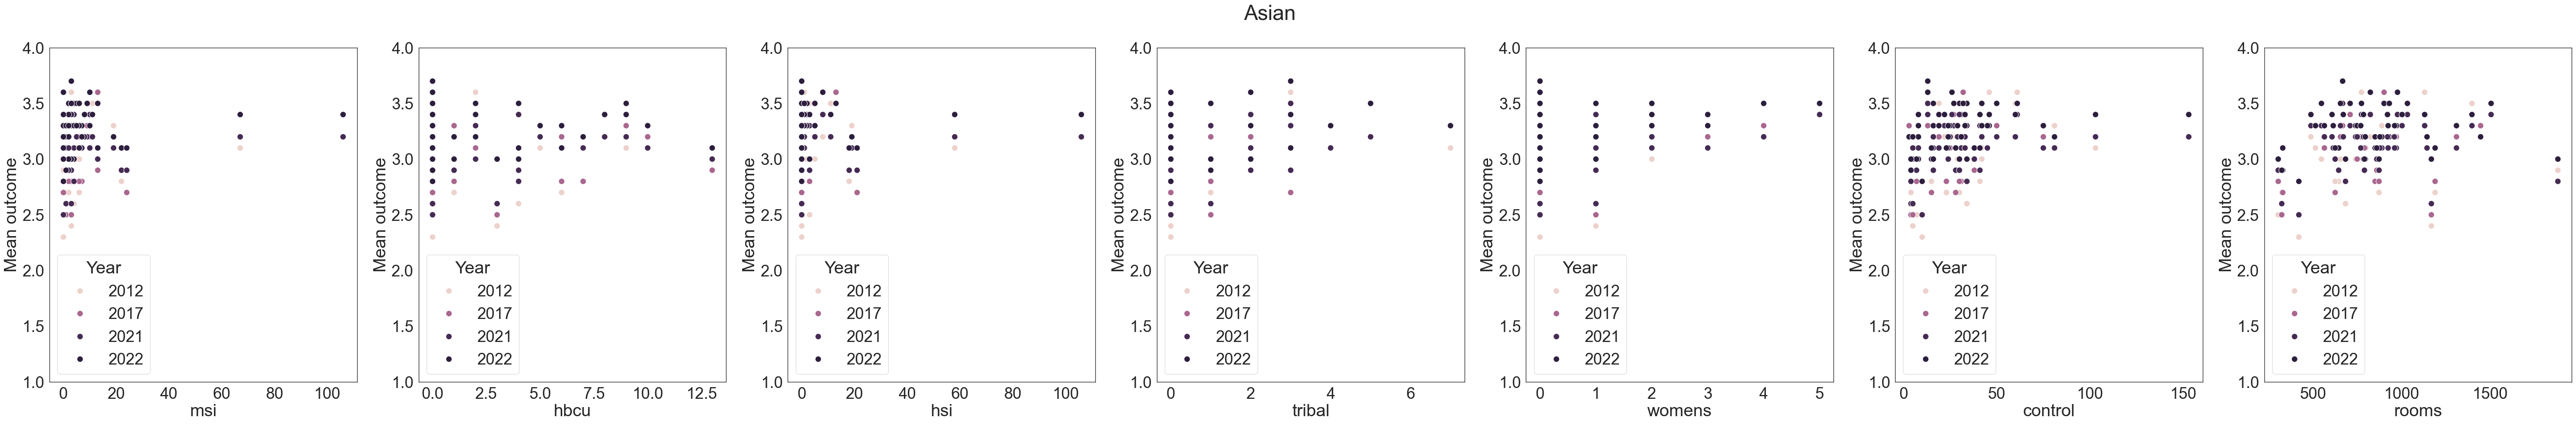

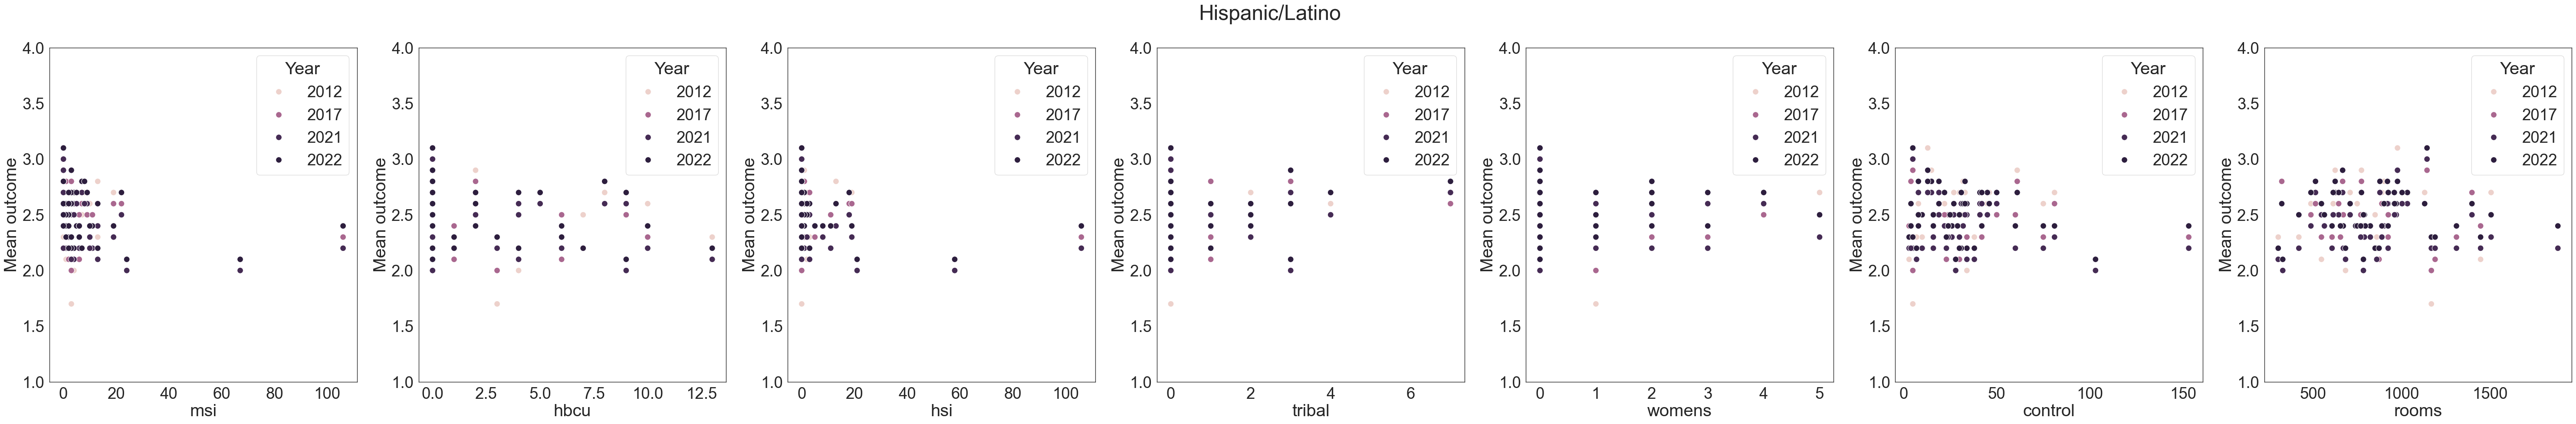

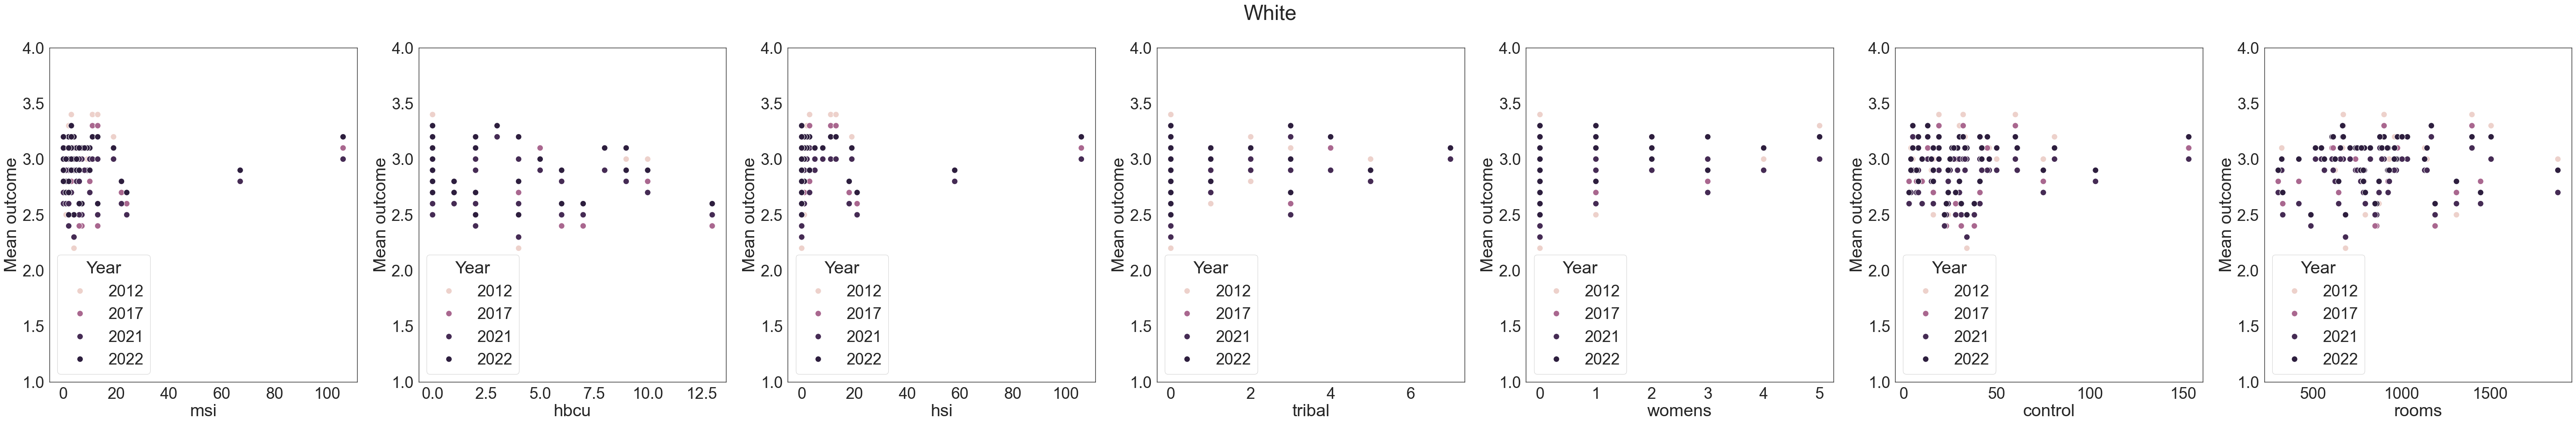

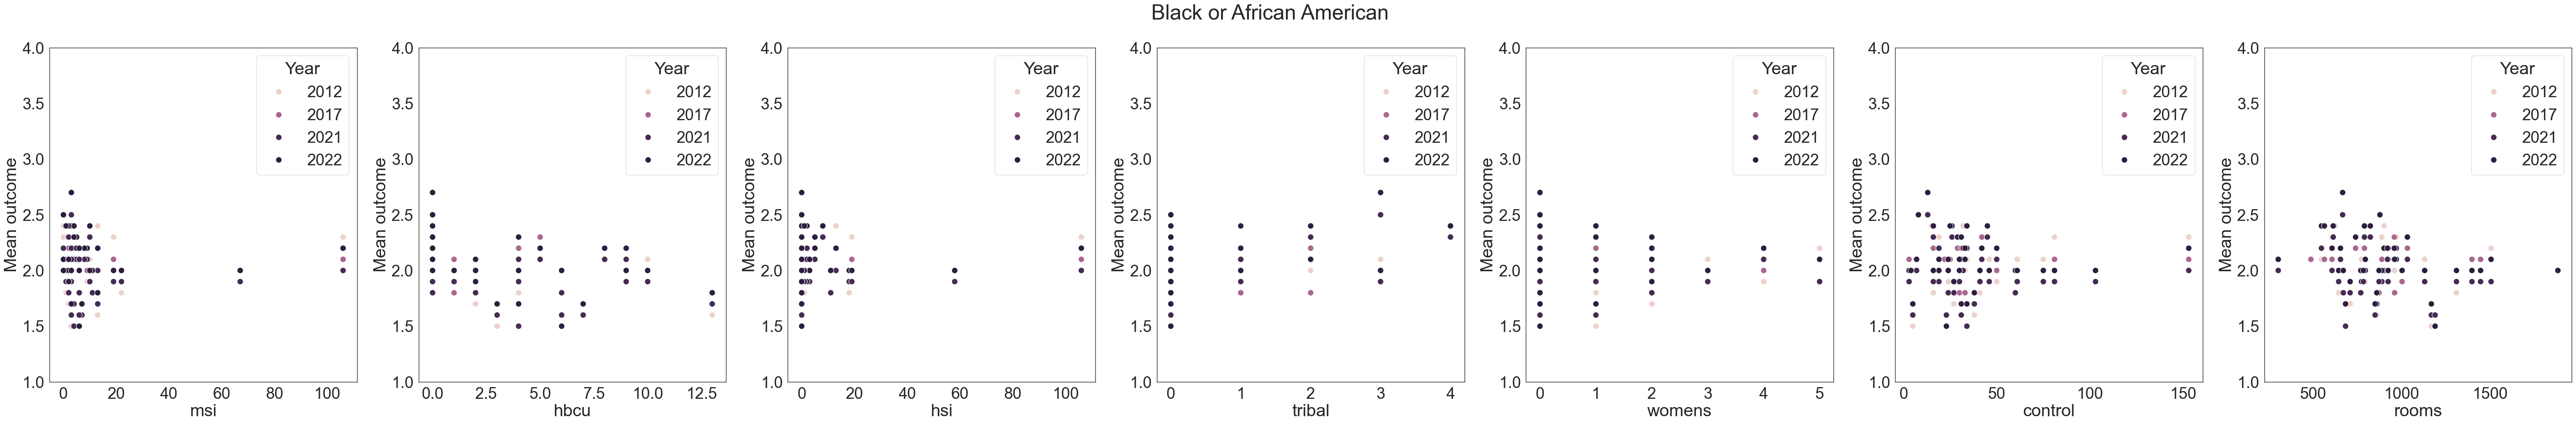

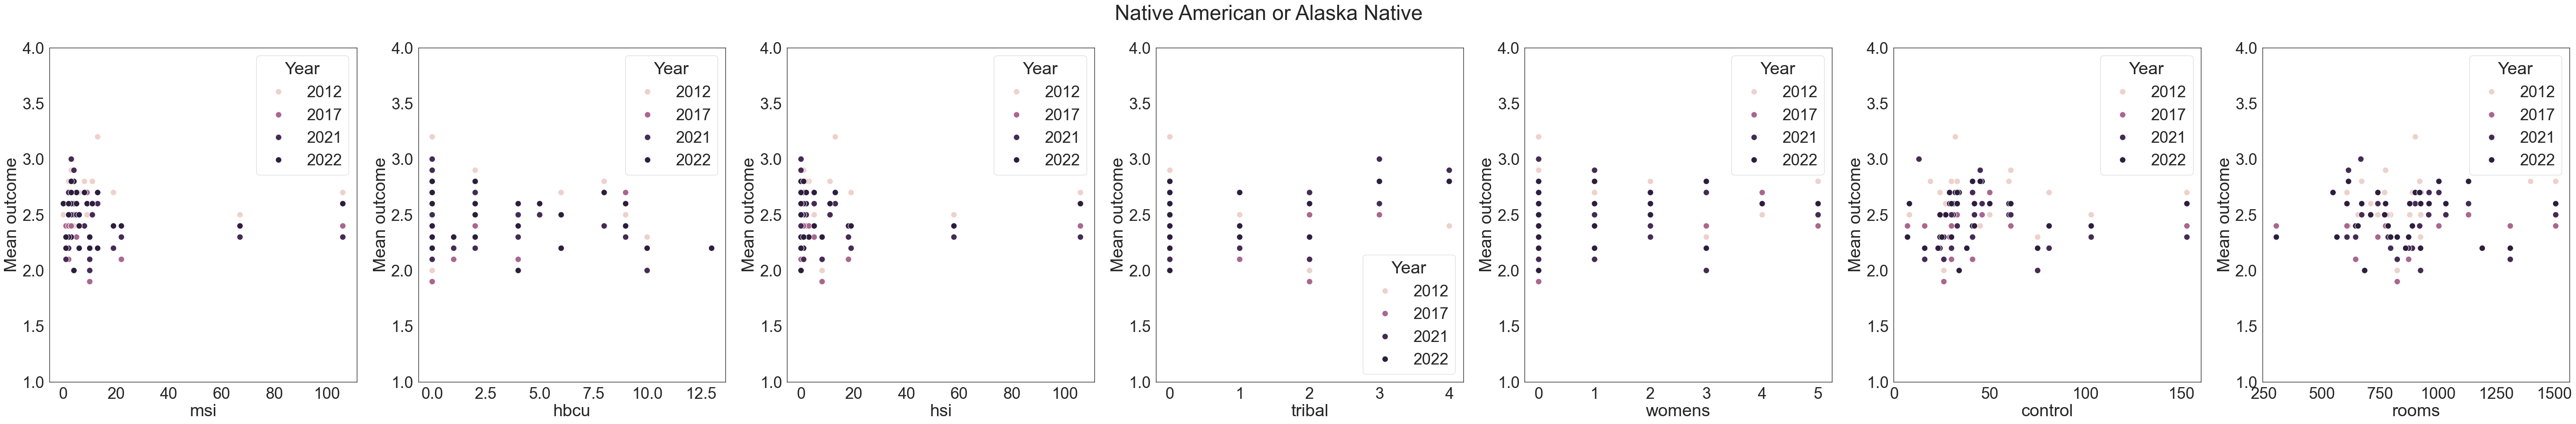

In [8]:
i=0

for race in minorities_ap:
    if race in ['Two or More Races','Native Hawaiian or other Pacific Islander','No Response']: continue
    j=0
    fig, axes=plt.subplots(1,len(carnegie_states_summed.keys())-1,figsize=(75,10))

    for category in carnegie_states_summed:
        if category=='stabbr': continue # skip state key
        sns.scatterplot(data=outcomes_ap_carnegie.loc[outcomes_ap_carnegie['State']!='National'].loc[outcomes_ap_carnegie['Race']==race],x=category,y='Mean',s=100,ax=axes[j],hue='Year')
        axes[j].set_ylim(int(outcomes_ap_carnegie['Mean'].min()),round(outcomes_ap_carnegie['Mean'].max()))
        # axes[j].set_xlim(-1,round(outcomes_ap_carnegie[category].max())+1)
        axes[j].set_xlabel(f'{category}')
        axes[j].set_ylabel('Mean outcome')
        j+=1
    fig.suptitle(f'{race}')
    i+=1
plt.show()
    # plt.legend(bbox_to_anchor=(1,1))

In [9]:
correlations={}
for race in minorities_ap:
    if race in ['Two or More Races','Native Hawaiian or other Pacific Islander','No Response']: continue
    corr_df=outcomes_ap_carnegie[['stabbr','Mean','msi', 'hbcu', 'hsi', 'tribal', 'womens', 'control', 'rooms']].loc[outcomes_ap_carnegie['Race']==race]
    corr_df.index=corr_df['stabbr']
    correlations[race]=corr_df[['Mean','msi','hbcu','hsi','tribal','womens','msi', 'hbcu', 'hsi', 'tribal', 'womens', 'control', 'rooms']].corr()['Mean']

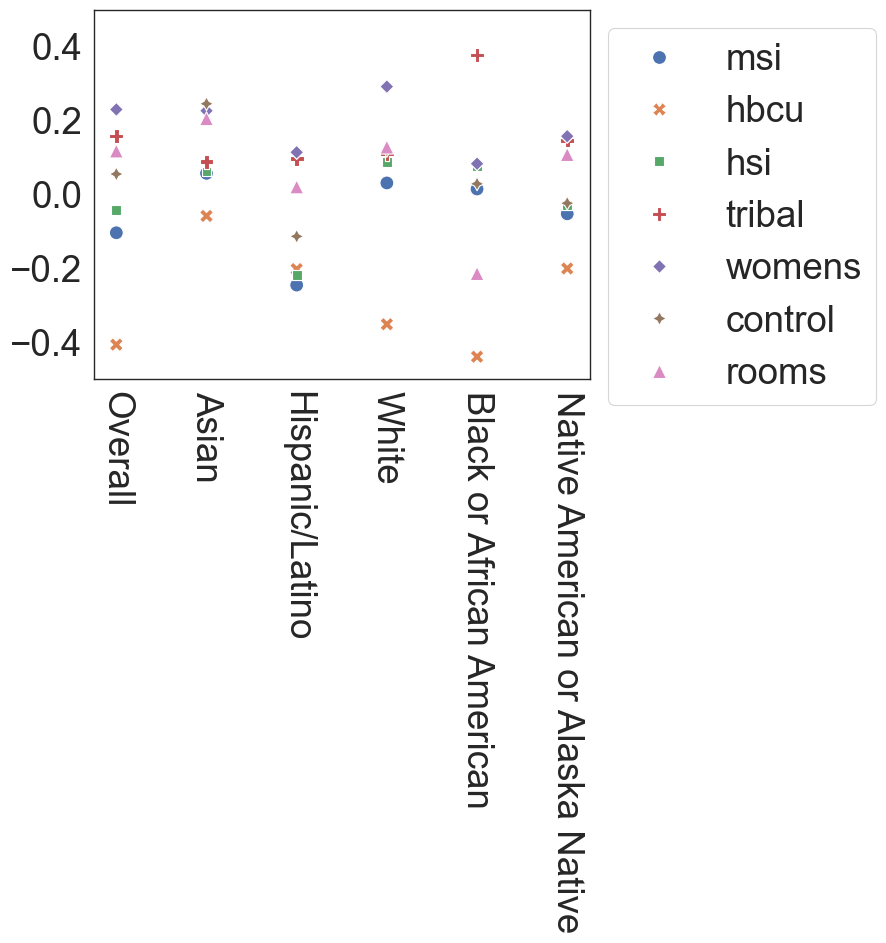

In [10]:
sns.scatterplot(data=pd.DataFrame(correlations).T.drop('Mean',axis=1),s=100)
plt.legend(bbox_to_anchor=(1,1))
plt.xticks(rotation=-90)
plt.ylim(-.5,.5)
plt.show()

In [12]:
correlations_no_0={}
outcomes_ap_carnegie_no_0=outcomes_ap_carnegie.loc[(outcomes_ap_carnegie!=0).any(axis=1)]
for race in minorities_ap:
    if race in ['Two or More Races','Native Hawaiian or other Pacific Islander','No Response']: continue
    corr_df=outcomes_ap_carnegie_no_0[['stabbr','Mean','msi', 'hbcu', 'hsi', 'tribal', 'womens', 'control', 'rooms']].loc[outcomes_ap_carnegie_no_0['Race']==race]
    corr_df.index=corr_df['stabbr']
    correlations_no_0[race]=corr_df[['Mean','msi','hbcu','hsi','tribal','womens','msi', 'hbcu', 'hsi', 'tribal', 'womens', 'control', 'rooms']].corr()['Mean']

In [17]:
outcomes_ap_carnegie_no_0

,State,Race,Score 5,Score 4,Score 3,Score 2,Score 1,Total,Mean,stabbr,Year,msi,hbcu,hsi,tribal,womens,control,rooms
9,Alabama,Overall,2345.0,4069.0,6297.0,8225.0,11205.0,32141.0,2.3,AL,2012,13,13,0,0,0,38,860.366667
10,Alabama,Asian,342.0,367.0,441.0,341.0,361.0,1852.0,3.0,AL,2012,13,13,0,0,0,38,860.366667
11,Alabama,Hispanic/Latino,62.0,93.0,192.0,207.0,308.0,862.0,2.3,AL,2012,13,13,0,0,0,38,860.366667
12,Alabama,White,1747.0,3192.0,4722.0,5640.0,6186.0,21487.0,2.5,AL,2012,13,13,0,0,0,38,860.366667
13,Alabama,Black or African American,86.0,248.0,655.0,1630.0,3855.0,6474.0,1.6,AL,2012,13,13,0,0,0,38,860.366667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1859,Wisconsin,Native American or Alaska Native,42.0,88.0,134.0,141.0,115.0,520.0,2.6,WI,2022,2,0,0,2,2,33,961.179104
1863,Wyoming,Overall,366.0,656.0,956.0,938.0,649.0,3565.0,2.8,WY,2022,0,0,0,0,0,8,785.333333
1864,Wyoming,Asian,25.0,23.0,22.0,13.0,12.0,95.0,3.4,WY,2022,0,0,0,0,0,8,785.333333
1865,Wyoming,Hispanic/Latino,24.0,61.0,90.0,109.0,102.0,386.0,2.5,WY,2022,0,0,0,0,0,8,785.333333


In [16]:
correlations['Overall']

Mean       1.000000
msi       -0.103760
hbcu      -0.406440
hsi       -0.041875
tribal     0.157715
womens     0.229848
msi       -0.103760
hbcu      -0.406440
hsi       -0.041875
tribal     0.157715
womens     0.229848
control    0.055179
rooms      0.117370
Name: Mean, dtype: float64

In [15]:
correlations_no_0['Overall']

Mean       1.000000
msi       -0.103760
hbcu      -0.406440
hsi       -0.041875
tribal     0.157715
womens     0.229848
msi       -0.103760
hbcu      -0.406440
hsi       -0.041875
tribal     0.157715
womens     0.229848
control    0.055179
rooms      0.117370
Name: Mean, dtype: float64

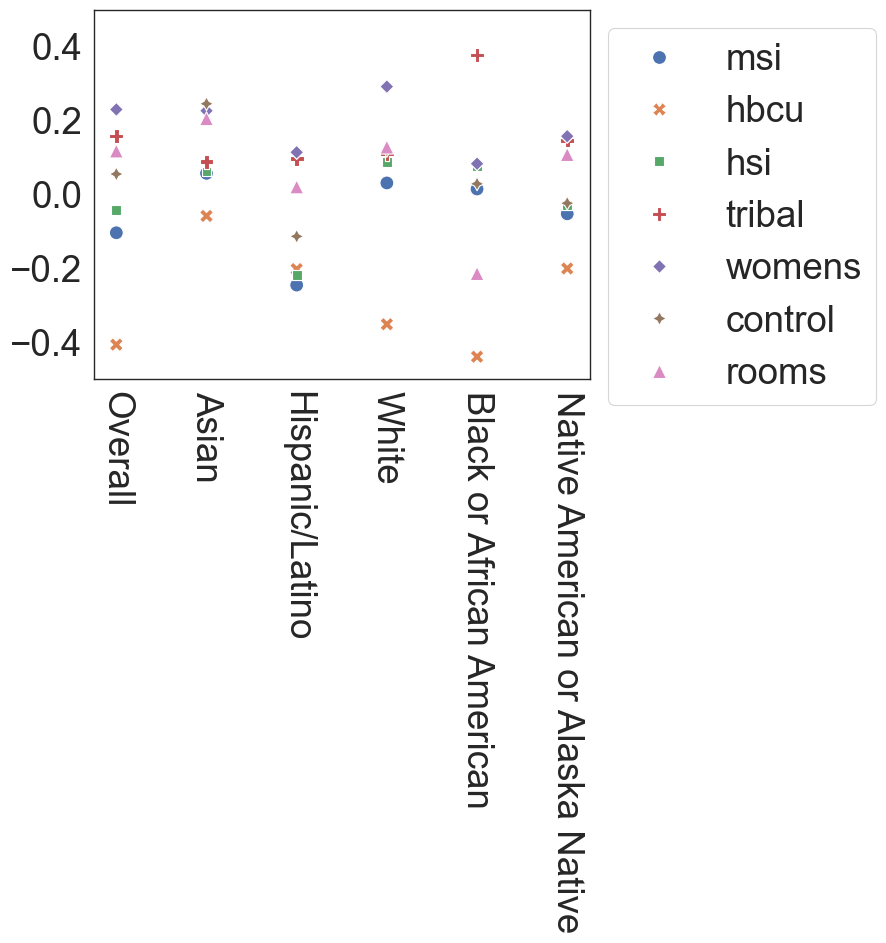

In [13]:
sns.scatterplot(data=pd.DataFrame(correlations_no_0).T.drop('Mean',axis=1),s=100)
plt.legend(bbox_to_anchor=(1,1))
plt.xticks(rotation=-90)
plt.ylim(-.5,.5)
plt.show()